In [63]:

import plotly.figure_factory as ff
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [76]:
main_data=pd.read_csv('heart_failure.csv')

In [77]:
main_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
# Age: age of the patient [years]
# Sex: sex of the patient [M: Male, F: Female]
# ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
# RestingBP: resting blood pressure [mm Hg]
# Cholesterol: serum cholesterol [mm/dl]
# FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
# RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
# MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
# ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
# Oldpeak: oldpeak = ST [Numeric value measured in depression]
# ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
# HeartDisease: output class [1: heart disease, 0: Normal]

In [107]:
#its a clean dataset
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 86.2 KB


In [108]:
#convert the binary columns to string
string_col = main_data.select_dtypes(include="object").columns
main_data[string_col]=main_data[string_col].astype("string")

In [109]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 86.2 KB


In [110]:
df=main_data

In [112]:
string_col=df.select_dtypes("string").columns.to_list()

In [113]:
num_col=df.columns.to_list()
#print(num_col)
for col in string_col:
    num_col.remove(col)
num_col.remove("HeartDisease")

In [114]:
num_col

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [115]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## EDA

In [ ]:
#corrlation matrix

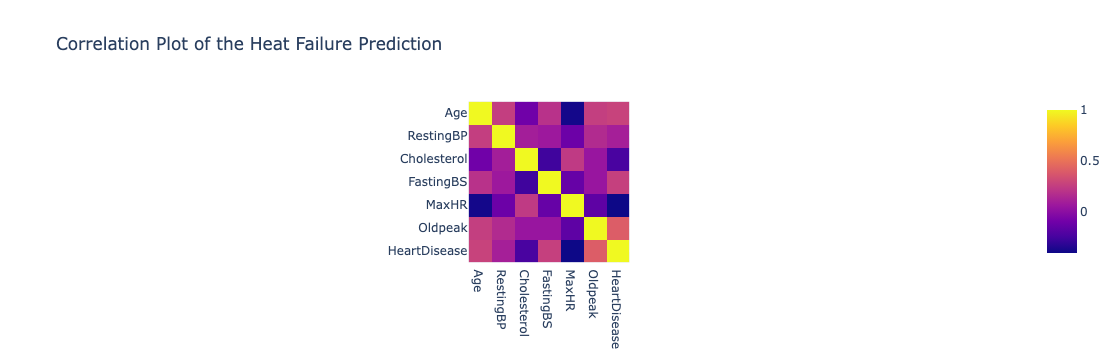

In [123]:
px.imshow(df[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak','HeartDisease']].corr(),title="Correlation Plot of the Heat Failure Prediction")

In [ ]:
#Its necessary to remove correlated variables to improve your model.

# age and MaxHr have negative correlation - means as age increases , heart rate decreases
#Heart disease and MaxHr have negative correlation - higher the heart rate lesser the chance of disease



In [147]:
df.groupby(['Sex']).count()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Sex,,,,,,,,,,,
F,193,193,193,193,193,193,193,193,193,193,193
M,725,725,725,725,725,725,725,725,725,725,725


In [ ]:
px.histogram()

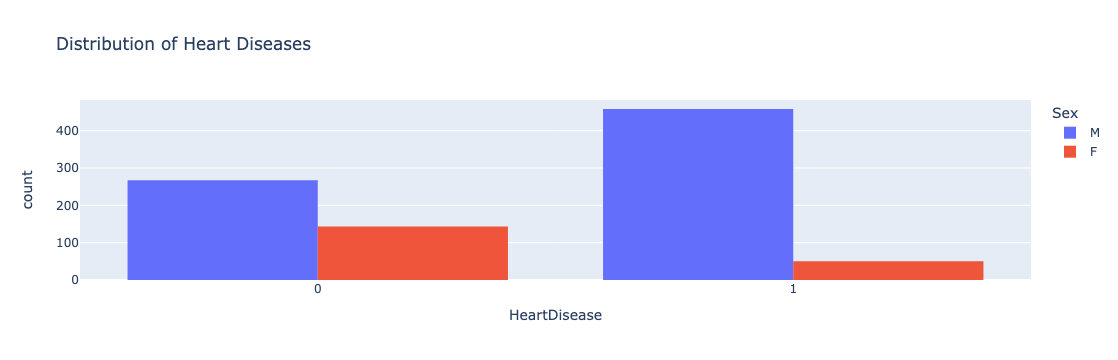

In [132]:
# Shows the Distribution of Heat Diseases with respect to male and female
fig=px.histogram(df, 
                 x="HeartDisease",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

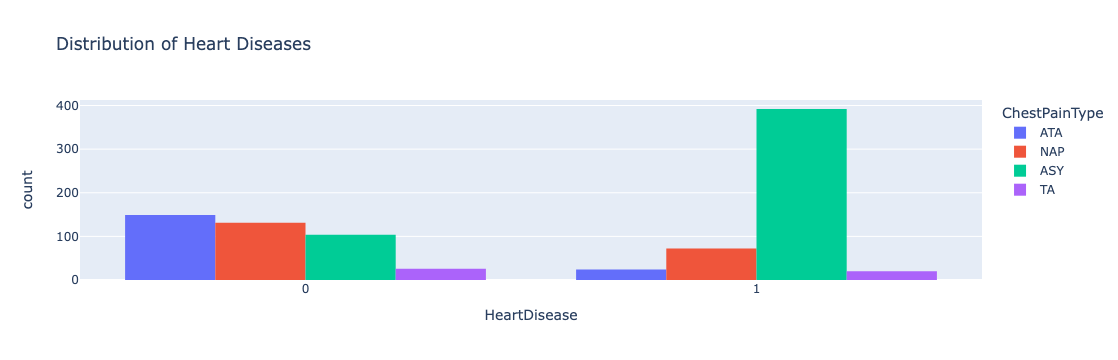

In [133]:
# Shows the Distribution of Heat Diseases with respect to ChestPainType
fig=px.histogram(df, 
                 x="HeartDisease",
                 color="ChestPainType",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

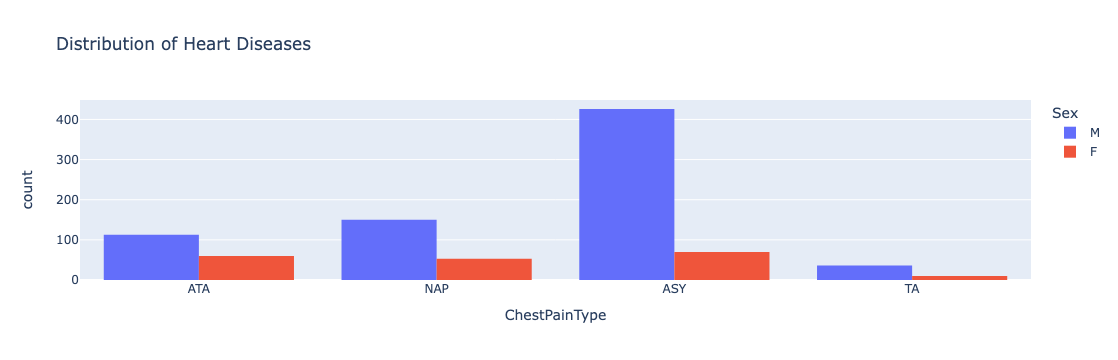

In [146]:
# Shows the Distribution of Heat Diseases with respect to ChestPainType
fig=px.histogram(df, 
                 x="ChestPainType",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

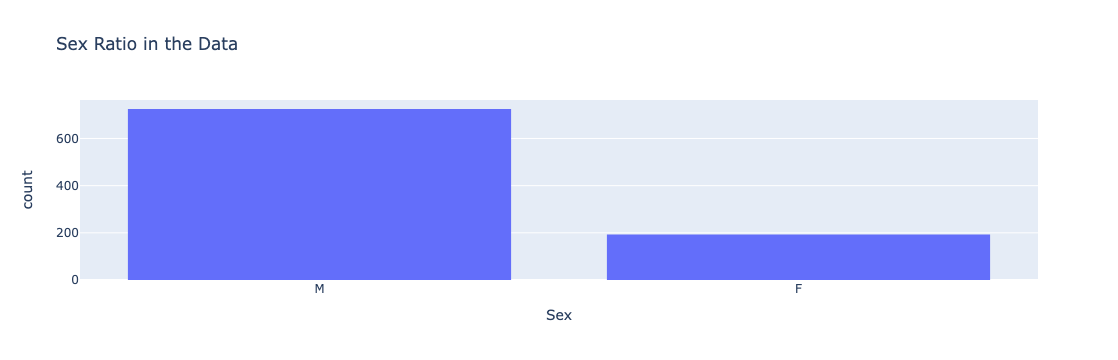

In [148]:
fig=px.histogram(df,
                 x="Sex",
                 hover_data=df.columns,
                 title="Sex Ratio in the Data")
fig.show()

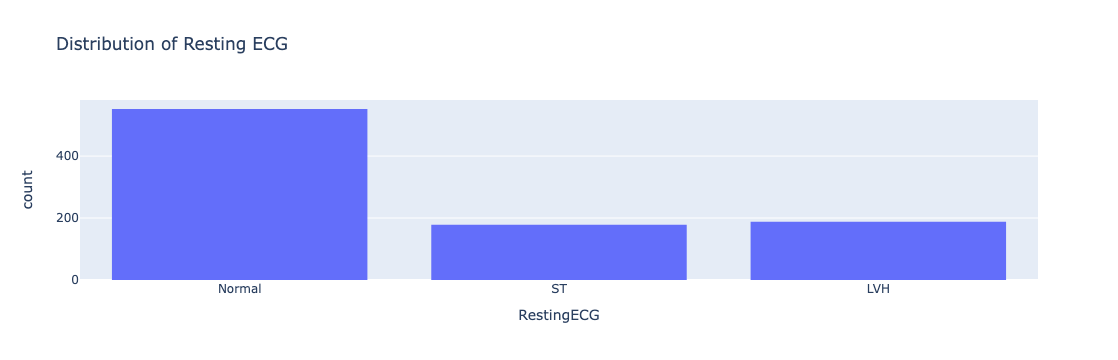

In [153]:
fig=px.histogram(df,
                 x="RestingECG",
                 hover_data=df.columns,
                 title="Distribution of Resting ECG")
fig.show()

[]

<Figure size 1500x1000 with 0 Axes>

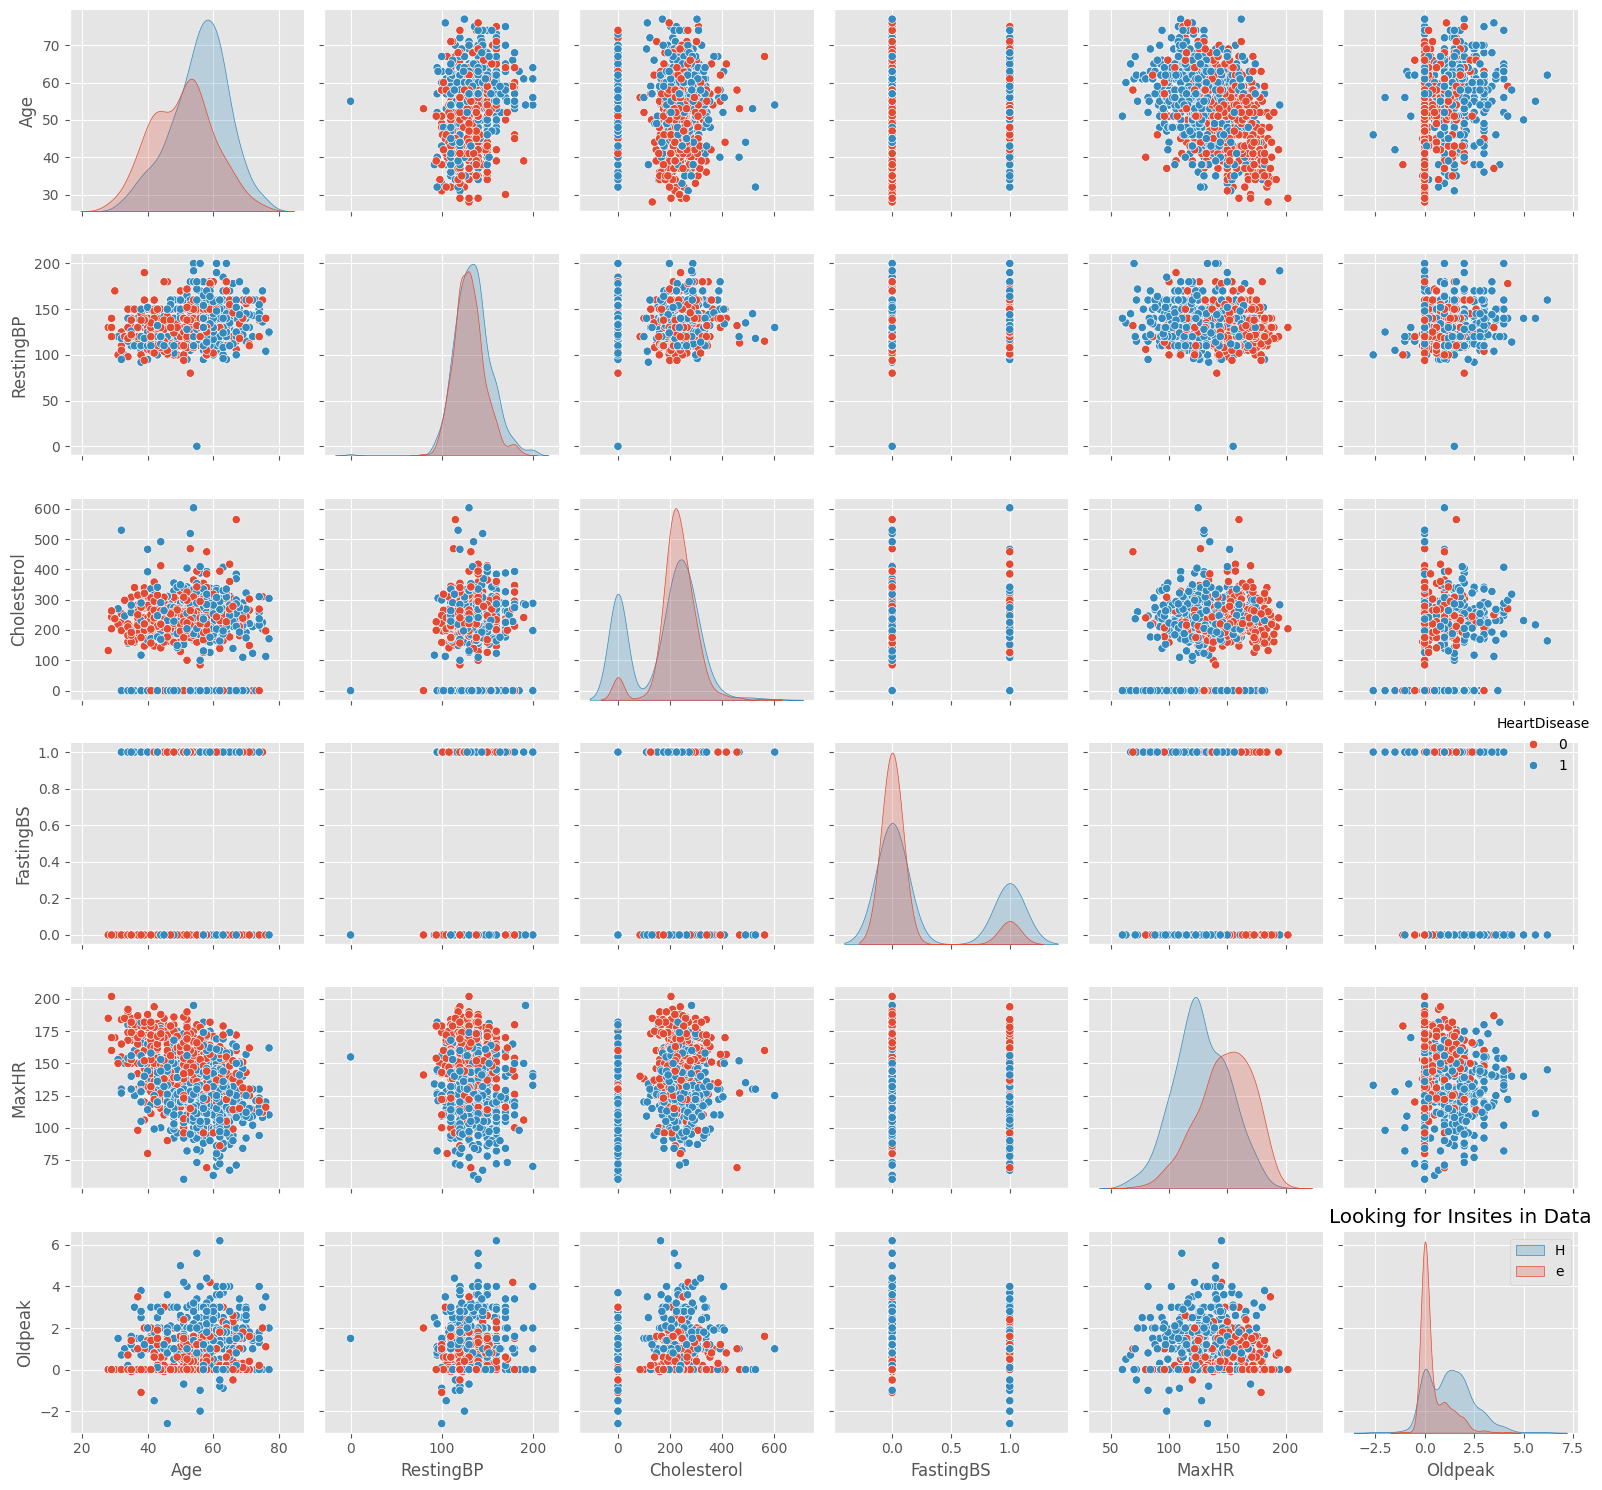

In [154]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

In [ ]:
enumerate()

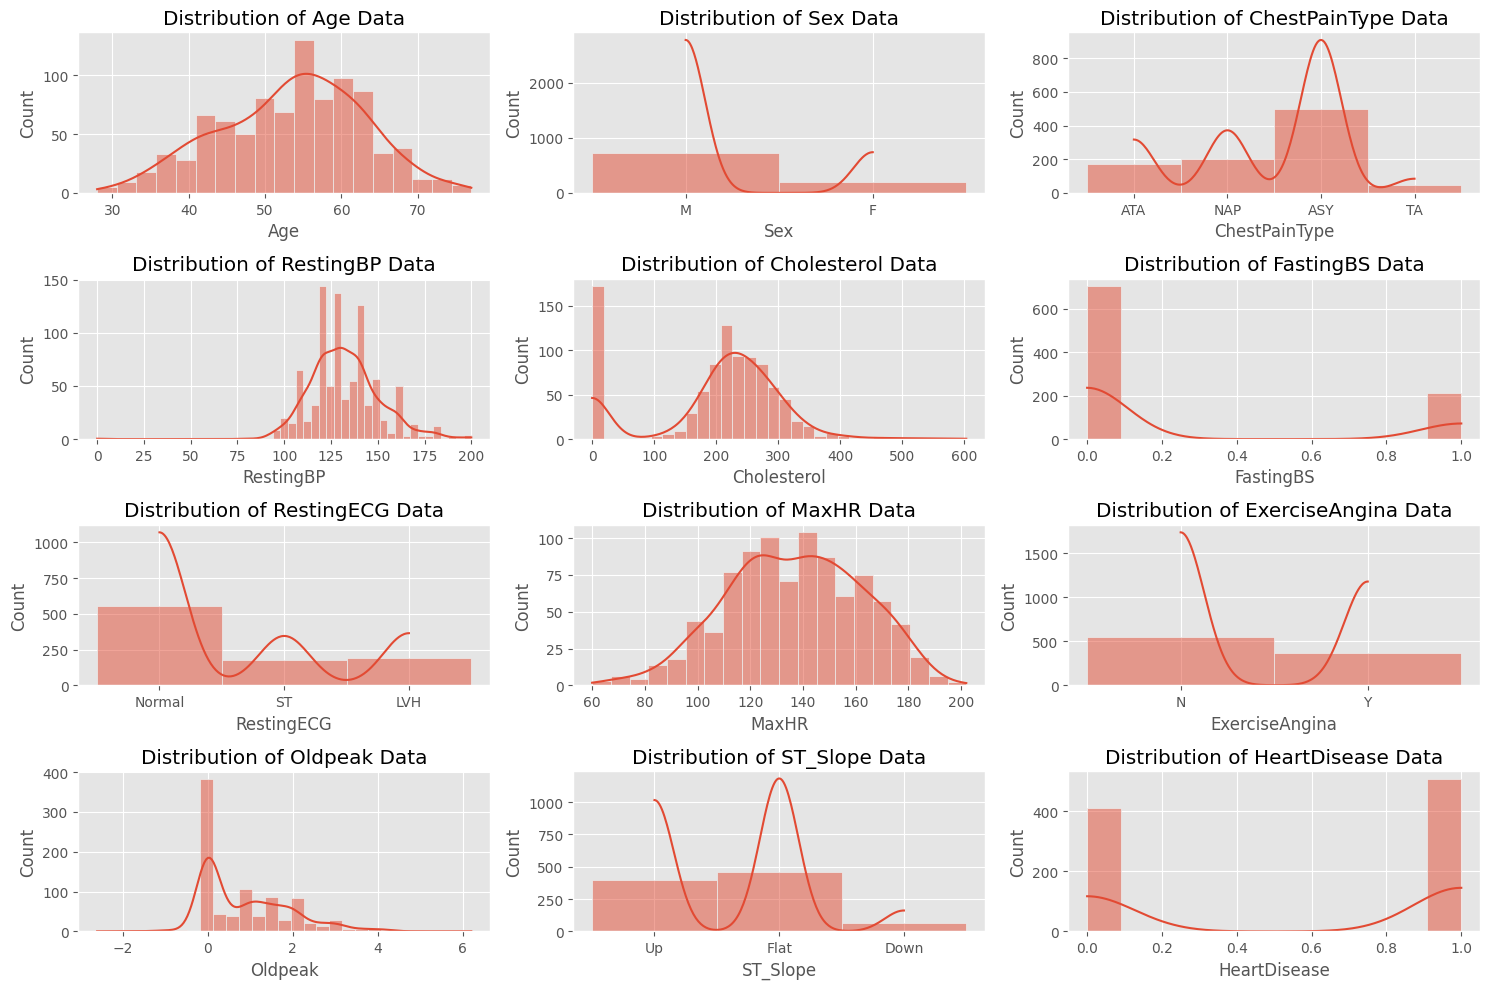

In [162]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

In [ ]:
#check outliers

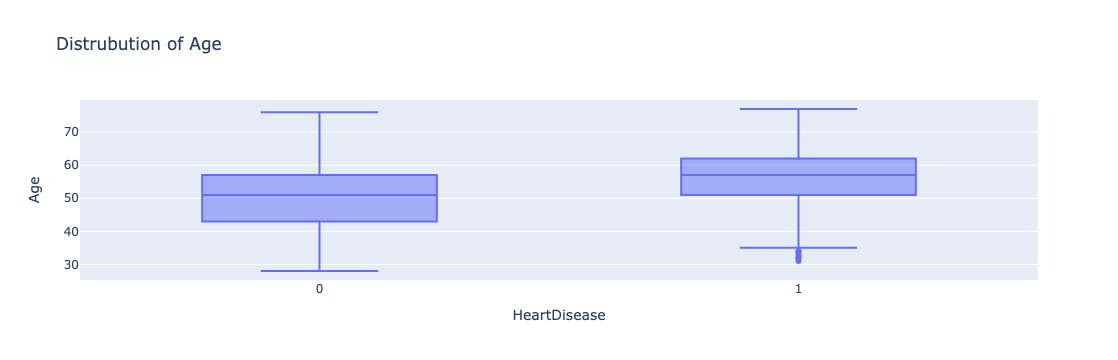

In [163]:
fig = px.box(df,y="Age",x="HeartDisease",title=f"Distrubution of Age")
fig.show()

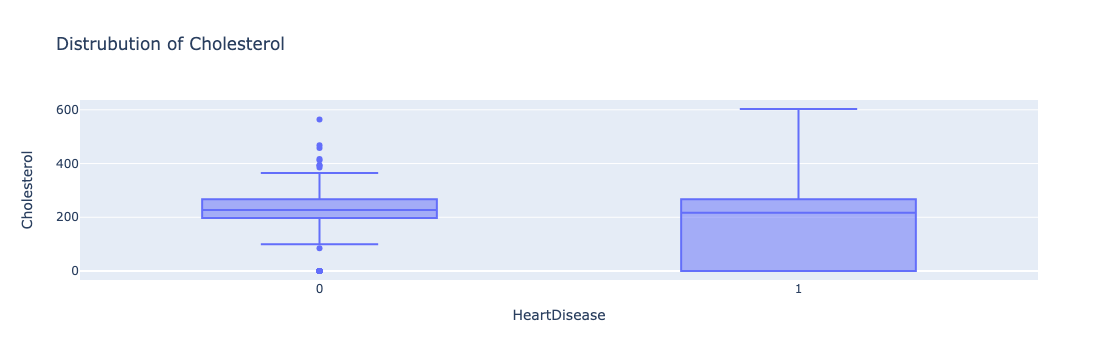

In [164]:
fig = px.box(df,y="Cholesterol",x="HeartDisease",title=f"Distrubution of Cholesterol")
fig.show()

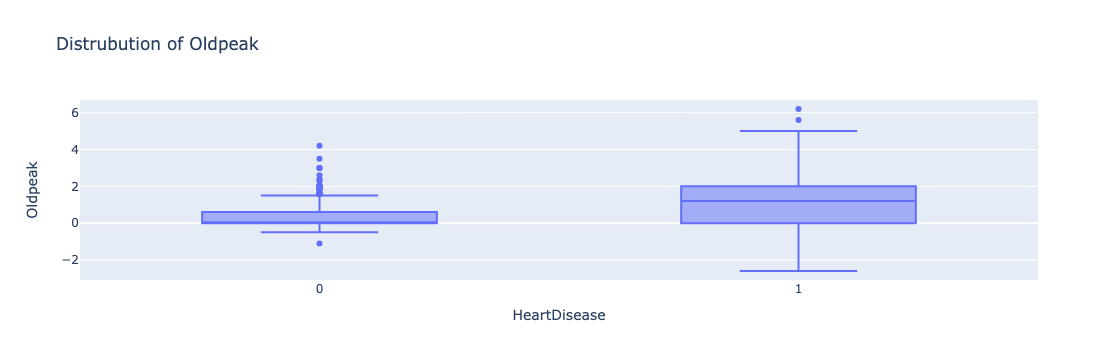

In [165]:
fig = px.box(df,y="Oldpeak",x="HeartDisease",title=f"Distrubution of Oldpeak")
fig.show()

In [166]:
# Checking for NULLs in the data
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

### univariant analysis

In [12]:
#AGE

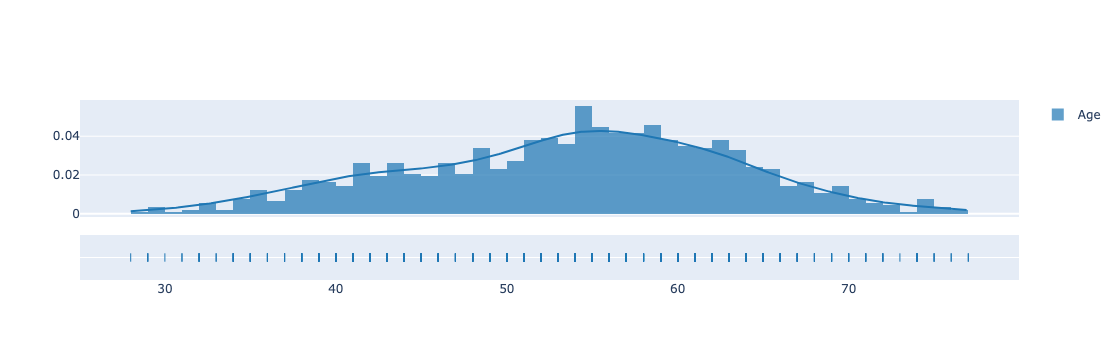

In [104]:
hist_data =  [df["Age"].values]
group_labels = ['Age']

ff.create_distplot(hist_data,group_labels)

#Age wise 40 to 75b the spread is High
#less than 40 age and higher than 80 age people are very low

In [66]:
#sex

<BarContainer object of 299 artists>

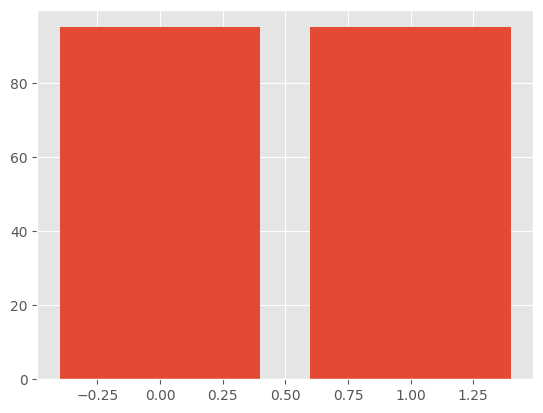

In [69]:
plt.bar(main_data['sex'],main_data['age'])

In [ ]:
#age vs sex

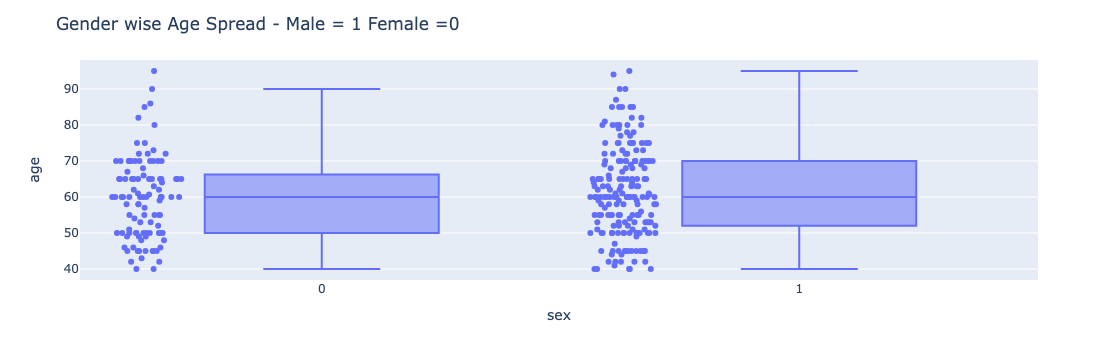

In [64]:
fig = px.box(main_data, x='sex', y='age',points='all')
fig.update_layout(
    title_text="Gender wise Age Spread - Male = 1 Female =0")


In [47]:
#analysis fo survived

In [167]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [171]:
df[string_col].head()
for col in string_col:
    print(f"The distribution of categorical valeus in the {col} is : ")
    print(df[col].value_counts())

The distribution of categorical valeus in the Sex is : 
Sex
M    725
F    193
Name: count, dtype: Int64
The distribution of categorical valeus in the ChestPainType is : 
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: Int64
The distribution of categorical valeus in the RestingECG is : 
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: Int64
The distribution of categorical valeus in the ExerciseAngina is : 
ExerciseAngina
N    547
Y    371
Name: count, dtype: Int64
The distribution of categorical valeus in the ST_Slope is : 
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: Int64


In [192]:
df_nontree=pd.get_dummies(df,columns=string_col,drop_first=False,dtype='int')
df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [193]:
# Getting the target column at the end
target="HeartDisease"
y=df_nontree[target].values
df_nontree.drop("HeartDisease",axis=1,inplace=True)
df_nontree=pd.concat([df_nontree,df[target]],axis=1)
df_nontree.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
1,49,160,180,0,156,1.0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,1
2,37,130,283,0,98,0.0,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
3,48,138,214,0,108,1.5,1,0,1,0,...,0,0,1,0,0,1,0,1,0,1
4,54,150,195,0,122,0.0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0


## Model traing

In [196]:
### Logstic regression

In [195]:
feature_col_nontree=df_nontree.columns.to_list()
feature_col_nontree.remove(target)

In [200]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
acc_log=[]

kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    #print(pd.DataFrame(X_valid).head())
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    
    clf=LogisticRegression()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_log.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}")
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        82
           1       0.93      0.83      0.88       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

The accuracy for Fold 1 : 0.8800813008130083
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        82
           1       0.91      0.80      0.85       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184

The accuracy for Fold 2 : 0.8531802965088474
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.65      0.77        82
           1       0.78      0.98      0.87       102

    accuracy                       

In [ ]:
#Naive bayers

In [201]:
from sklearn.naive_bayes import GaussianNB
acc_Gauss=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=GaussianNB()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Gauss.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        82
           1       0.93      0.79      0.86       102

    accuracy                           0.85       184
   macro avg       0.86      0.86      0.85       184
weighted avg       0.87      0.85      0.85       184

The accuracy for 1 : 0.8604734576757532
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        82
           1       0.93      0.85      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

The accuracy for 2 : 0.8837876614060258
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.63      0.76        82
           1       0.77      0.98      0.86       102

    accuracy                           0.83  

In [202]:
## SVM 

In [203]:
# Using Linear Kernel
from sklearn.svm import SVC
acc_svm=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="linear")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        82
           1       0.92      0.82      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

The accuracy for 1 : 0.8690817790530847
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.91      0.84        82
           1       0.92      0.78      0.85       102

    accuracy                           0.84       184
   macro avg       0.85      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8494739359158296
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.65      0.77        82
           1       0.78      0.98      0.87       102

    accuracy                           0.83  

In [204]:
## Using Sigmoid Kernel
from sklearn.svm import SVC
acc_svm_sig=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="sigmoid")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_sig.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.83      0.84      0.84        82
           1       0.87      0.86      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

The accuracy for 1 : 0.852104256336681
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        82
           1       0.80      0.75      0.77       102

    accuracy                           0.76       184
   macro avg       0.75      0.76      0.75       184
weighted avg       0.76      0.76      0.76       184

The accuracy for 2 : 0.7566953610712578
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.85      0.73      0.78        82
           1       0.81      0.89      0.85       102

    accuracy                           0.82   

In [205]:
## Using RBF kernel
from sklearn.svm import SVC
acc_svm_rbf=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="rbf")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_rbf.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        82
           1       0.91      0.93      0.92       102

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184

The accuracy for 1 : 0.9108082257293162
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        82
           1       0.91      0.78      0.84       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8433763749402199
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.89      0.70      0.78        82
           1       0.79      0.93      0.86       102

    accuracy                           0.83  

In [206]:
## Using RBF kernel
from sklearn.svm import SVC
acc_svm_poly=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="poly")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_poly.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        82
           1       0.92      0.89      0.91       102

    accuracy                           0.90       184
   macro avg       0.89      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184

The accuracy for 1 : 0.897297943567671
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        82
           1       0.91      0.78      0.84       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8433763749402199
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.93      0.63      0.75        82
           1       0.77      0.96      0.85       102

    accuracy                           0.82   

In [207]:
# K-NN

In [208]:
## Using RBF kernel
from sklearn.neighbors import KNeighborsClassifier
acc_KNN=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=KNeighborsClassifier(n_neighbors=32)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_KNN.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        82
           1       0.93      0.93      0.93       102

    accuracy                           0.92       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184

The accuracy for 1 : 0.9230033476805357
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        82
           1       0.91      0.79      0.85       102

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8482783357245336
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.92      0.72      0.81        82
           1       0.81      0.95      0.87       102

    accuracy                           0.85  

In [211]:
# decision tree

In [210]:
feature_col_tree=df_tree.columns.to_list()
feature_col_tree.remove(target)

In [212]:
from sklearn.tree import DecisionTreeClassifier
acc_Dtree=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):
    
    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]
    
    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]
    
    clf=DecisionTreeClassifier(criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Dtree.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.68      0.84      0.75        82
           1       0.84      0.69      0.76       102

    accuracy                           0.76       184
   macro avg       0.76      0.76      0.76       184
weighted avg       0.77      0.76      0.76       184

The accuracy for 1 : 0.763868962219034
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.69      0.90      0.78        82
           1       0.89      0.67      0.76       102

    accuracy                           0.77       184
   macro avg       0.79      0.78      0.77       184
weighted avg       0.80      0.77      0.77       184

The accuracy for 2 : 0.7845528455284552
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.86      0.62      0.72        82
           1       0.75      0.92      0.83       102

    accuracy                           0.79   

In [218]:
[target]

['HeartDisease']

In [222]:
feature_col_tree

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope']

In [224]:
# random forest

In [223]:
from sklearn.ensemble import RandomForestClassifier
acc_RandF=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):
    
    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]
    
    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]
    
    clf=RandomForestClassifier(n_estimators=200,criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_RandF.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        82
           1       0.93      0.83      0.88       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

The accuracy for 1 : 0.8800813008130083
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.91      0.84        82
           1       0.92      0.78      0.85       102

    accuracy                           0.84       184
   macro avg       0.85      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8494739359158296
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.98      0.63      0.77        82
           1       0.77      0.99      0.87       102

    accuracy                           0.83  

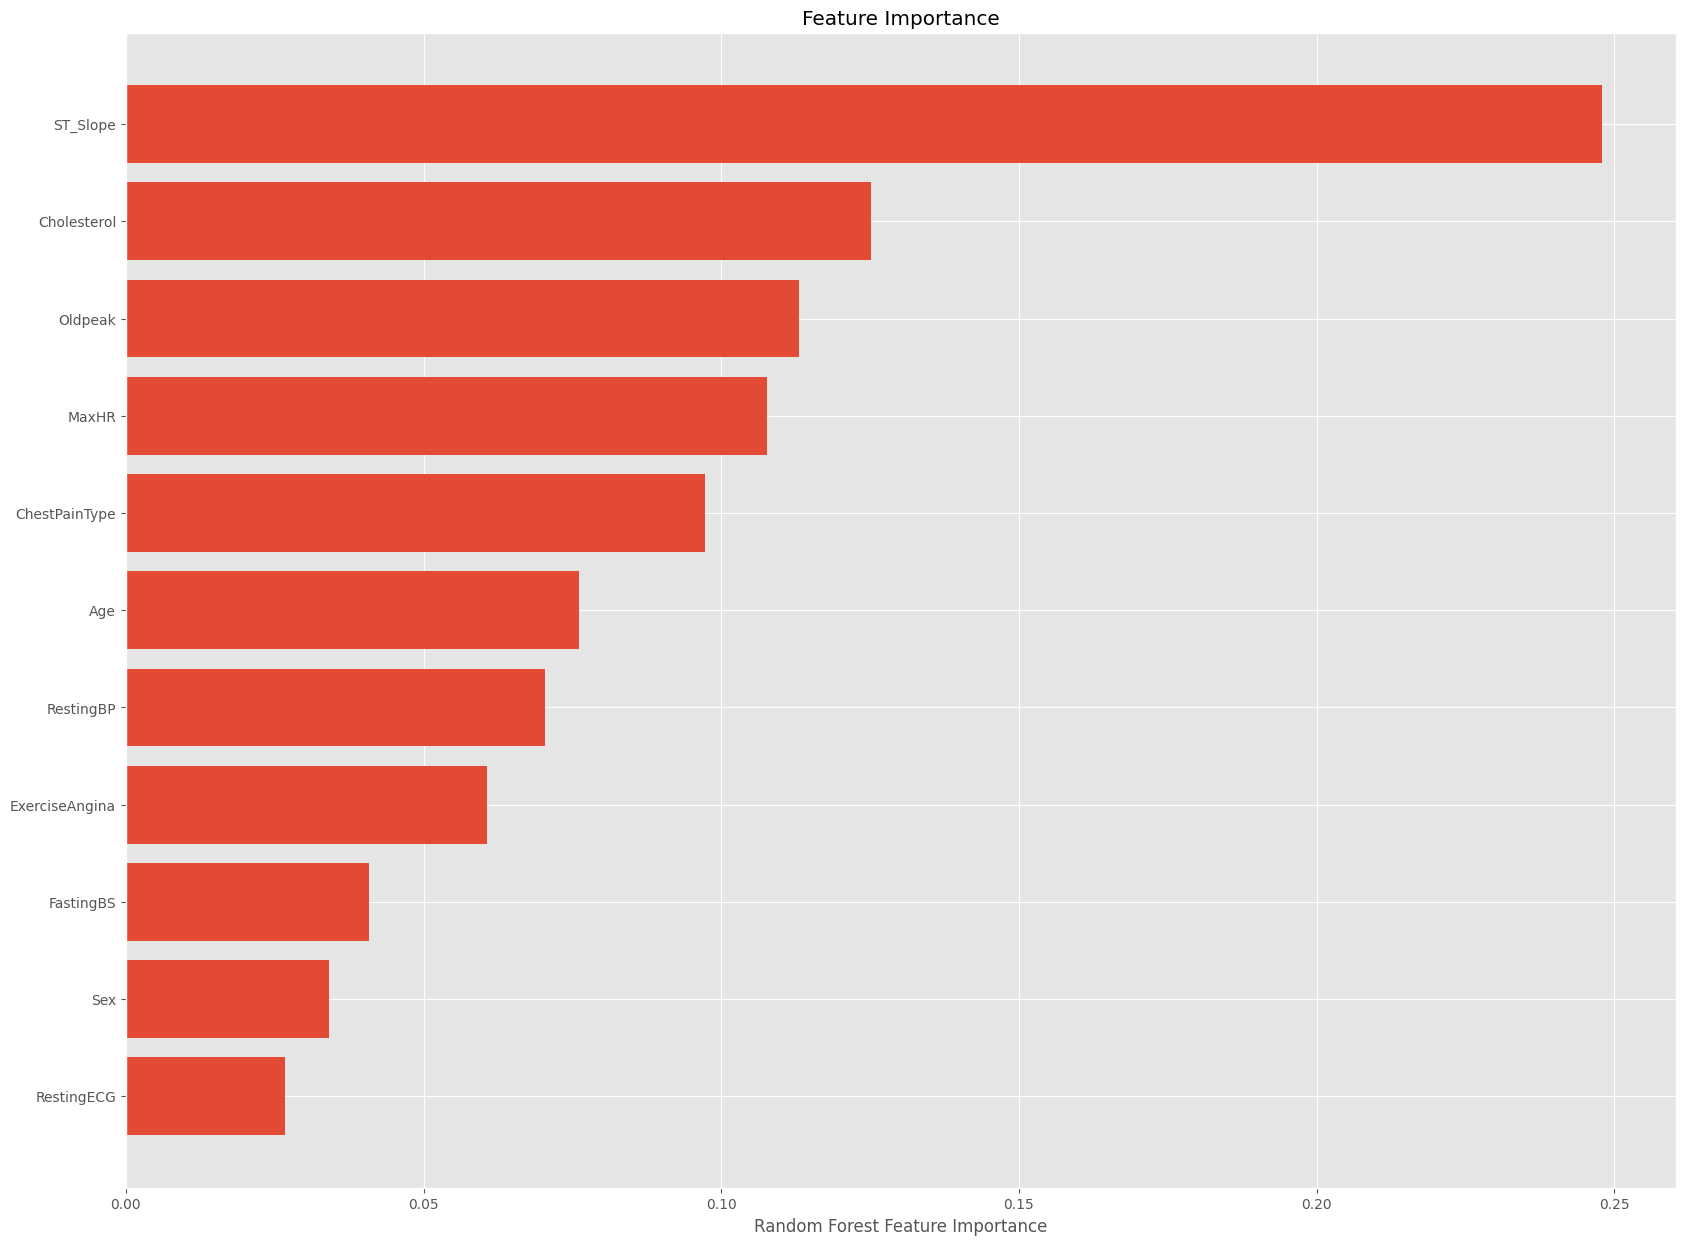

In [225]:
## Checking Feature importance 

plt.figure(figsize=(20,15))
importance = clf.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)),importance[idxs],align="center")
plt.yticks(range(len(idxs)),[feature_col_tree[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
#plt.tight_layout()
plt.show()

In [ ]:
#XG boost

In [228]:
from xgboost import XGBClassifier
acc_XGB=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):
    
    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]
    
    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]
    
    clf=XGBClassifier()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_XGB.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.83      0.93      0.87        82
           1       0.93      0.84      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.88      0.88       184

The accuracy for 1 : 0.884983261597322
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.91      0.84        82
           1       0.92      0.78      0.85       102

    accuracy                           0.84       184
   macro avg       0.85      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8494739359158296
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.61      0.75        82
           1       0.76      0.98      0.85       102

    accuracy                           0.82   